# Exploratory Data Analysis

## Import Basic Libraries 

In [64]:
import pandas as pd
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
import seaborn as sns 

In [66]:
vg = pd.read_csv("video_games_sales.csv") #vg = video games 
vg.info() #shows all variables in the dataset, the quantity of non-null data points in each variables, and the amount of each data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16327 non-null  float64
 4   genre         16598 non-null  object 
 5   publisher     16540 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [68]:
vg.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [70]:
vg.tail()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [72]:
vg.describe().T #shows the basic summary stats of each numeric variable

,count,mean,std,min,25%,50%,75%,max
rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
na_sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
eu_sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
jp_sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
other_sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
global_sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


The highest video game sales occurred in North America, with the assumption that consumers in the U.S. were one of the main buyers. North American sales make up about half of the global sales.

In [75]:
vg = vg.rename(columns = {"rank": "Sales Rank", "na_sales": "North American Sales (in millions)", "eu_sales": "European Sales (in millions)", 
                          "jp_sales": "Japan Sales (in millions)", "other_sales": "Other Sales (in millions)", 
                          "global_sales": "Global Sales (in millions)"})
vg.columns.tolist()

['Sales Rank',
 'name',
 'platform',
 'year',
 'genre',
 'publisher',
 'North American Sales (in millions)',
 'European Sales (in millions)',
 'Japan Sales (in millions)',
 'Other Sales (in millions)',
 'Global Sales (in millions)']

In [77]:
vg

,Sales Rank,name,platform,year,genre,publisher,North American Sales (in millions),European Sales (in millions),Japan Sales (in millions),Other Sales (in millions),Global Sales (in millions)
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


The dataframe has been updated with more descriptive variable names to improve model development and enhance machine learning.

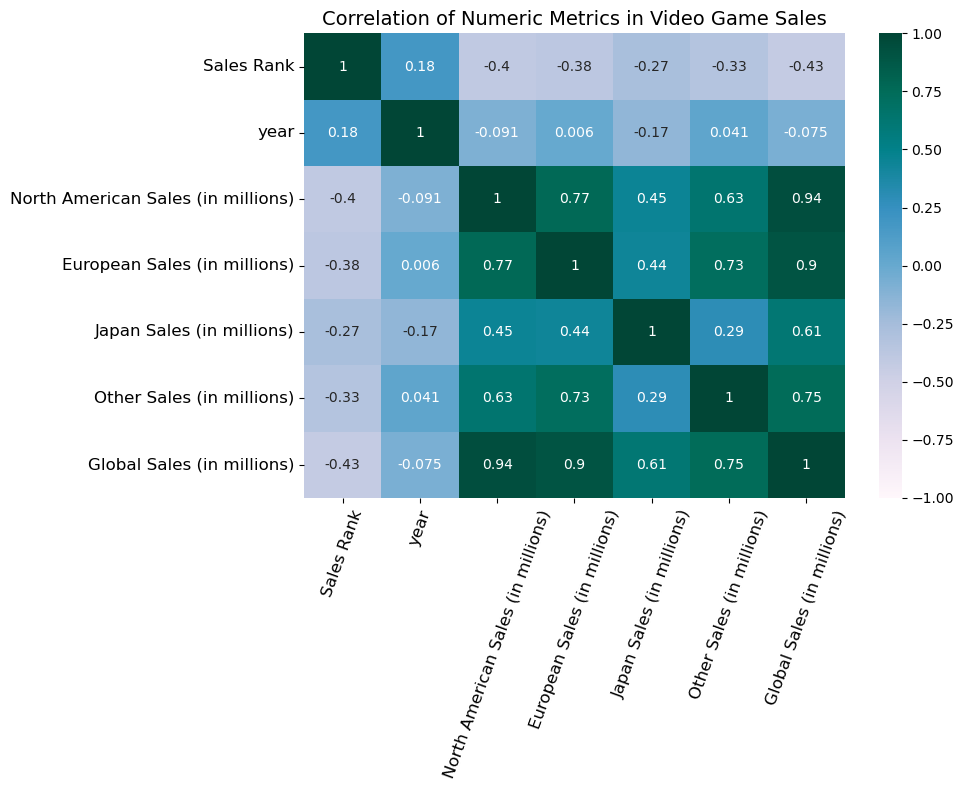

In [129]:
numeric_vg = vg.select_dtypes(include = ["int64", "float64"])
corr_matrix = numeric_vg.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, cmap = "PuBuGn", vmin = -1, vmax = 1)
plt.title("Correlation of Numeric Metrics in Video Game Sales", fontsize = 14)
plt.xticks(rotation = 70, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12)
plt.tight_layout()
#plt.savefig("Correlation of Numeric Metrics in Video Game Sales.png", bbox_inches = "tight", dpi = 300)
plt.show()

There is a very high correlation between Global Sales and the other regional sales. This is understandable as the Global Sales column is a summation of the other values; therefore, it should be removed. Furthermore, Other Sales seems to have a high correlation with European Sales at 0.73, so we want to remove it to decrease multicolinearity.

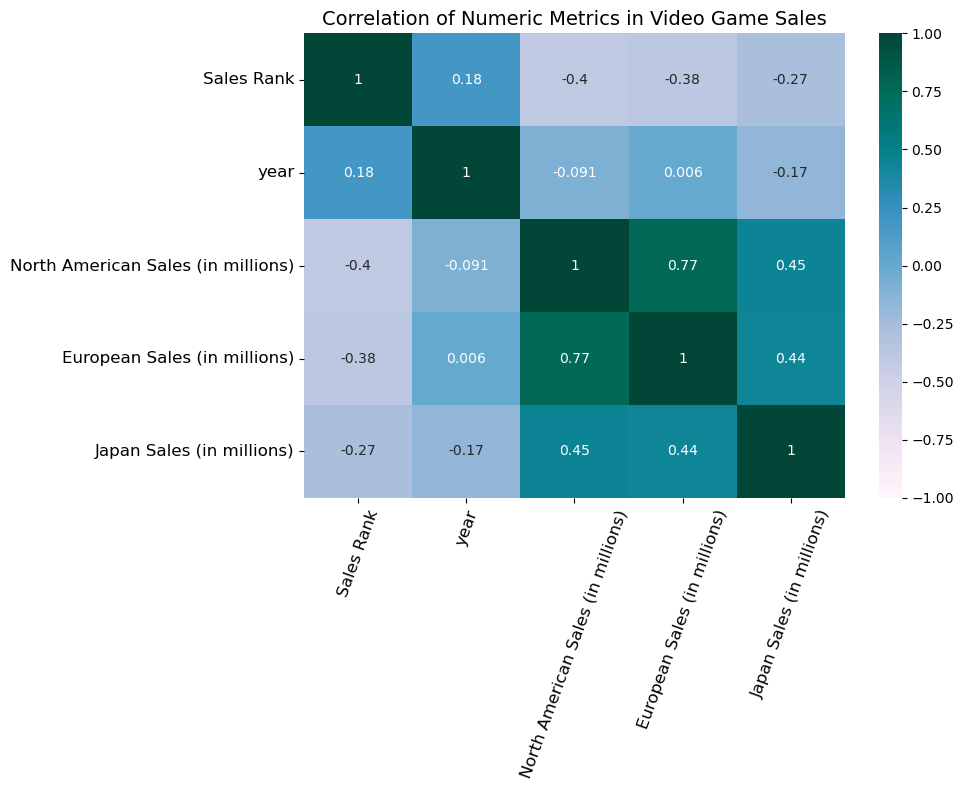

In [115]:
vg2 = vg.copy()
vg2 = vg2.drop(columns = ["Other Sales (in millions)", "Global Sales (in millions)"])
numeric_vg = vg2.select_dtypes(include = ["int64", "float64"])
corr_matrix = numeric_vg.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, cmap = "PuBuGn", vmin = -1, vmax = 1)
plt.title("Correlation of Numeric Metrics in Video Game Sales", fontsize = 14)
plt.xticks(rotation = 70, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12)
plt.tight_layout()
#plt.savefig("Correlation of Numeric Metrics in Video Game Sales.png", bbox_inches = "tight", dpi = 300)
plt.show()

After removing Global Sales and Other Sales, the overall heatmap appears much better, although there is still a moderate correlation between Japan Sales and European Sales (r = 0.44).

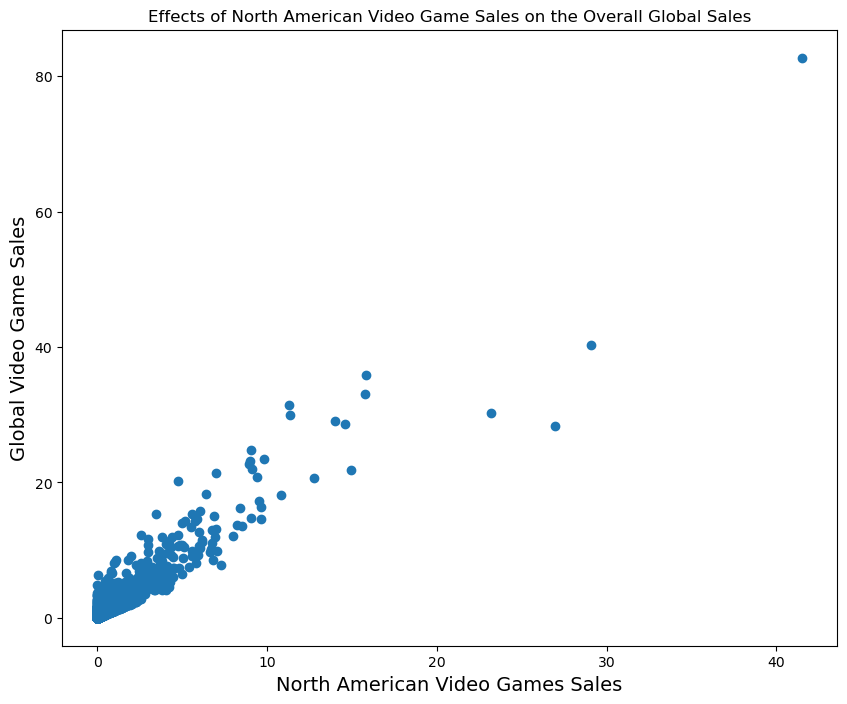

In [91]:
north_american = vg["North American Sales (in millions)"]
global_sales = vg["Global Sales (in millions)"]
plt.figure(figsize = (10, 8))
plt.scatter(north_american, global_sales)
plt.title("Effects of North American Video Game Sales on the Overall Global Sales")
plt.xlabel("North American Video Games Sales", fontsize = 14)
plt.ylabel("Global Video Game Sales", fontsize = 14)
plt.show()

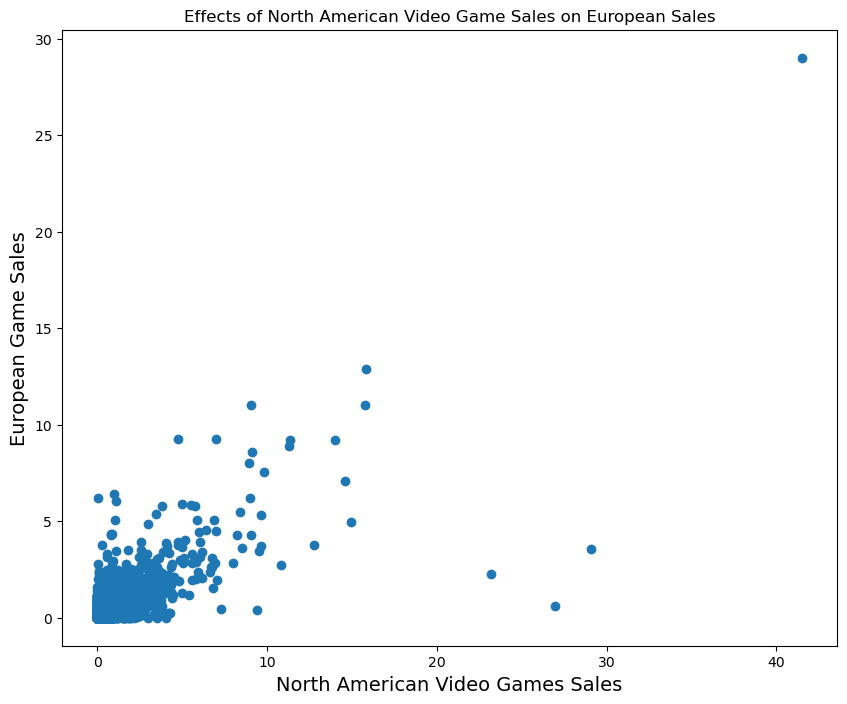

In [93]:
north_american = vg["North American Sales (in millions)"]
european = vg["European Sales (in millions)"]
plt.figure(figsize = (10, 8))
plt.scatter(north_american, european)
plt.title("Effects of North American Video Game Sales on European Sales")
plt.xlabel("North American Video Games Sales", fontsize = 14)
plt.ylabel("European Game Sales", fontsize = 14)
plt.show()

In [136]:
columns = vg.columns
for c in columns:
    print(f"\n{c}")
    print(vg[c].isnull().sum())


Sales Rank
0

name
0

platform
0

year
0

genre
0

publisher
0

North American Sales (in millions)
0

European Sales (in millions)
0

Japan Sales (in millions)
0

Other Sales (in millions)
0

Global Sales (in millions)
0


There are missing values in the year and publisher columns. To clean the missing values, we will impute the mean for the year and designate all unlisted publishers as "Unknown".

In [133]:
# Clean missing variables
vg["year"] = vg["year"].fillna(vg["year"].mean())
vg["publisher"] = vg["publisher"].fillna("Unknown")

print("Year:", vg["year"].isnull().sum())
print("Publisher:", vg["publisher"].isnull().sum())

Year: 0
Publisher: 0
